<h1><b><font color = black><a id='division_ID0'>2001 - 2010 INDIA AUTOTHEFT STATISTICS</a></font></b></h1><br>
<b>Built by Arijit Roy, Arkadeep Roy, Soumodip Ghosh, Ankita Datta, Shayani Das</b>
<br><b>Guidance - Indranil Das, Technical Analyst, Webskitters Academy</b>
<br><b>In Association with Webskitters Academy</b>
<br><b>Hooghly Engineering & Technology College</b>

<p><b>Download Dataset Dependency - <a href = "https://drive.google.com/drive/folders/1JNcmOZ5Hwbhvh2rHtsbcWn9WKtFururI?usp=sharing">Click here</a></b></p>

<h3><b>Contents</b></h3>

[Data Collection](#division_ID1) | [Data Preprocessing](#division_ID2) | [Data Visualization](#division_ID3)

<h2><a id='division_ID1'>Data Collection</a></h2>

[MENU](#division_ID0)

In [1]:
# import dataset from local repository
import pandas as pd
df = pd.read_csv('auto_theft.csv')
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946
...,...,...,...,...,...,...,...
1860,Tamil Nadu,2010,AT6-Total,6. Total (Sum of 1-5 Above),2563.0,3541.0,5205
1861,Tripura,2010,AT6-Total,6. Total (Sum of 1-5 Above),NaN,26.0,50
1862,Uttar Pradesh,2010,AT6-Total,6. Total (Sum of 1-5 Above),505.0,2434.0,16705
1863,Uttarakhand,2010,AT6-Total,6. Total (Sum of 1-5 Above),NaN,244.0,853


<h2><a id='division_ID2'>Data Preprocessing</a></h2>

[MENU](#division_ID0)

In [2]:
# check for null values in the dataframe
df.isnull().sum()

Area_Name                          0
Year                               0
Group_Name                         0
Sub_Group_Name                     0
Auto_Theft_Coordinated/Traced    346
Auto_Theft_Recovered              28
Auto_Theft_Stolen                  0
dtype: int64

In [3]:
# fill the null values with 0
df.fillna(0, inplace = True)

In [4]:
# drop unneccesary columns
df.drop(['Group_Name', 'Sub_Group_Name'], axis = 1, inplace = True)

In [5]:
# change the datatypes of columns as int 
for i in range(1, len(list(df.columns))):
    df.iloc[:, i] = df.iloc[:, i].astype(int)
autotheft = df.copy()

<h2><a id='division_ID3'>Data Visualization</a></h2>

[MENU](#division_ID0)

- <h3><b>2001 - 2010 Autotheft Stolen Statewise comparison</b></h3>

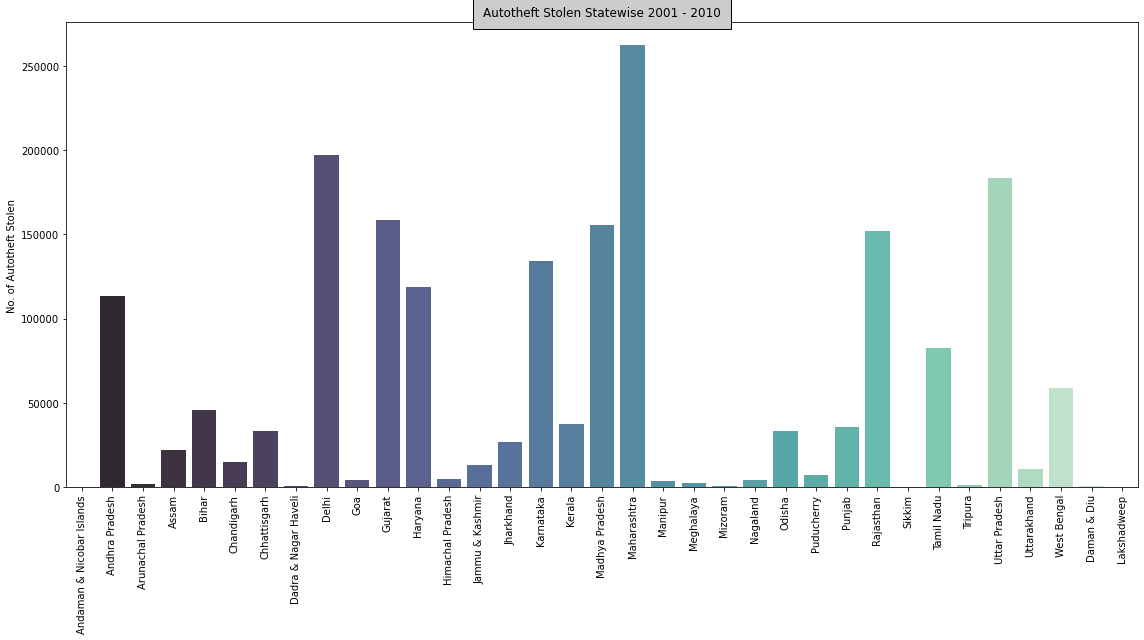

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
area_names = df.iloc[:, 0].unique()
stolen = []
for i in area_names:
    stolen.append(df[df.iloc[:, 0] == i].iloc[:, -1].sum())
plt.figure(figsize = (16, 9))
plt.title('Autotheft Stolen Statewise 2001 - 2010', bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
sns.barplot(x = area_names, y = stolen, palette = 'mako', alpha = 0.9)
plt.xticks(rotation = 90)
plt.ylabel('No. of Autotheft Stolen')
plt.tight_layout()
plt.show()

- <h3><b>2001 - 2010 Autotheft Stolen and Recovered Yearwise Statewise</b></h3>

In [7]:
def plot_details(state_name):
    import numpy as np
    timeline = df.iloc[:, 1].unique()
    stolen = []
    recovered = []
    r = np.arange(len(timeline))
    w = 0.2
    for i in timeline:
        new = df[df.iloc[:, 0] == state_name]
        new = new[new.iloc[:, 1] == i]
        recovered.append(new.iloc[:, -2].sum())
        stolen.append(new.iloc[:, -1].sum()) 
    plt.figure(figsize = (16, 9))
    plt.bar(r, recovered, width = w, alpha = 0.7)
    plt.bar(r+w, stolen, width = w, alpha = 0.8)
    plt.xlabel('No. of Autotheft Stolen')
    plt.ylabel('Timeline')
    plt.xticks(r+w/2, timeline)
    plt.title(state_name + ' 2001 - 2010 Autoheft Stolen Yearwise', bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
    plt.legend(['Recovered', 'Stolen'])
    plt.show()

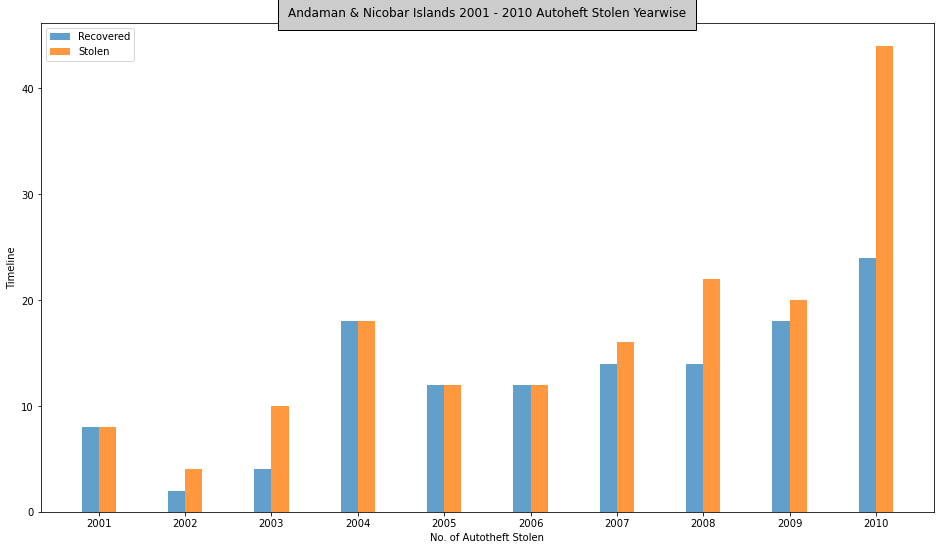

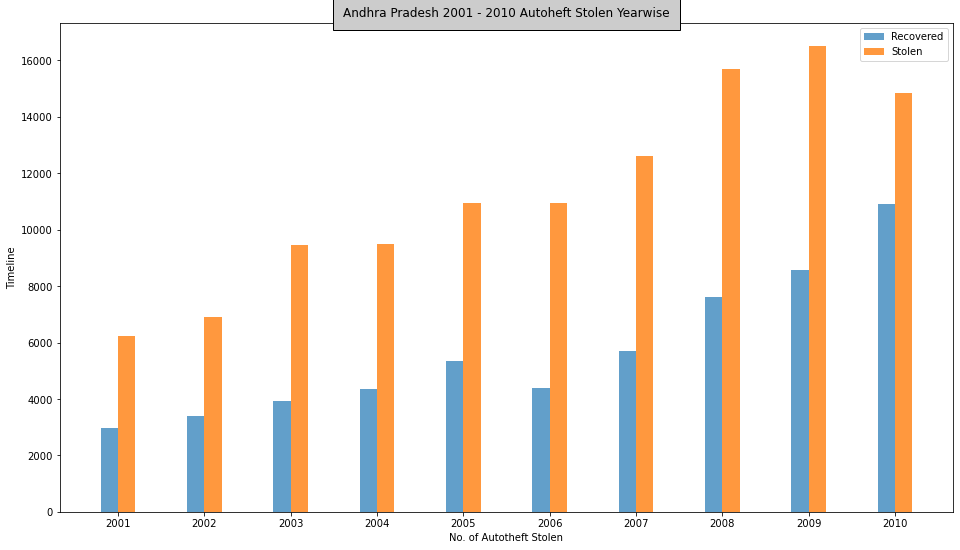

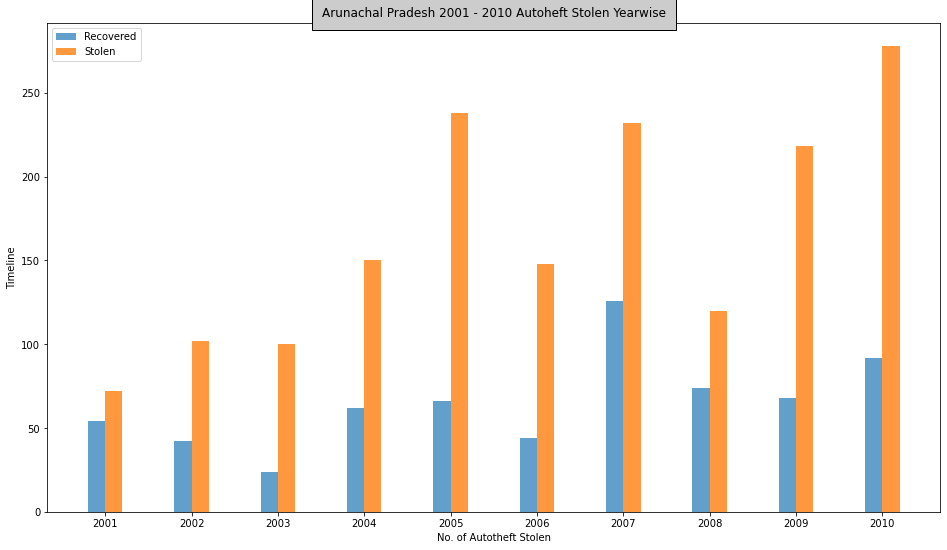

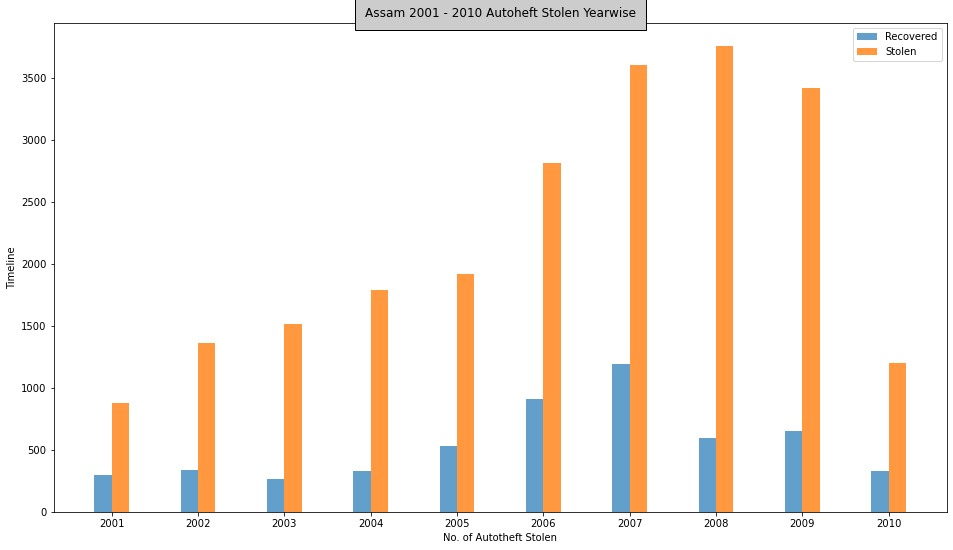

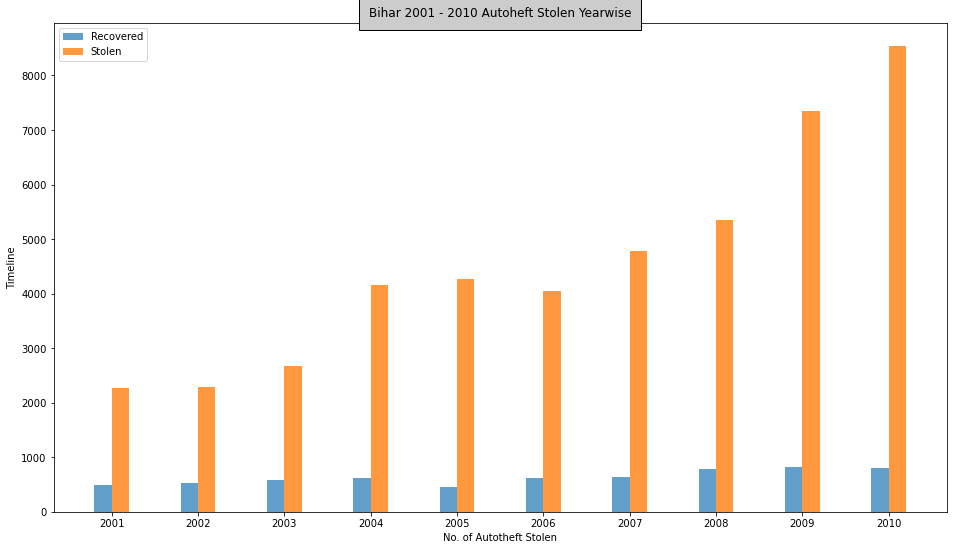

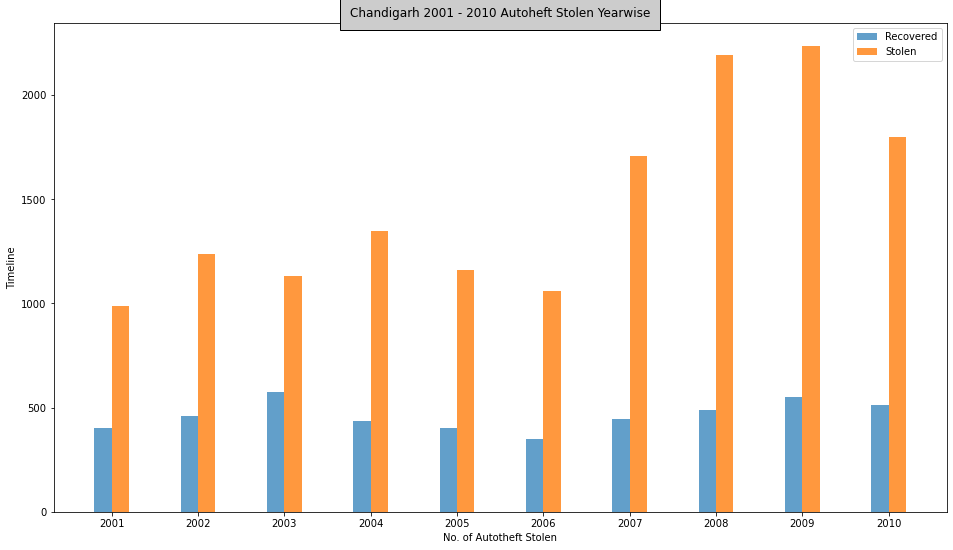

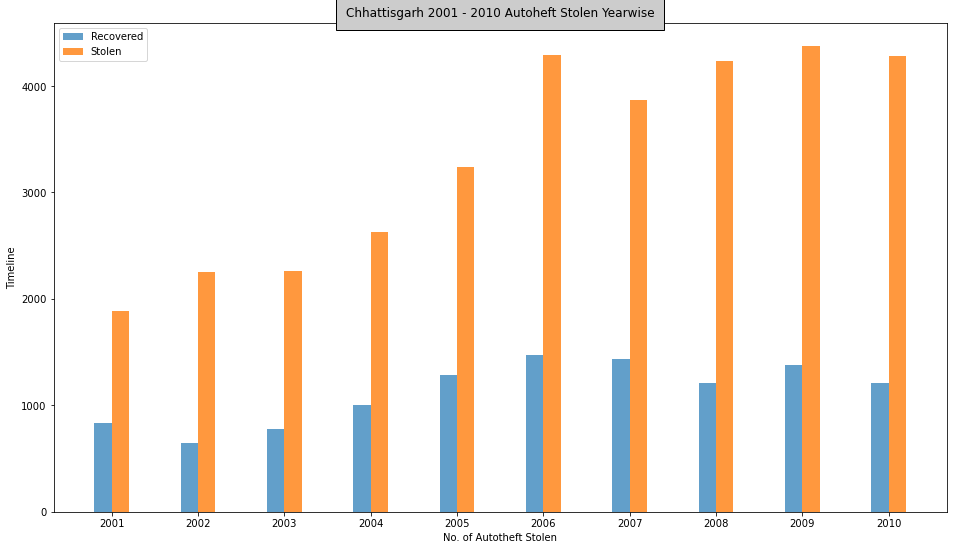

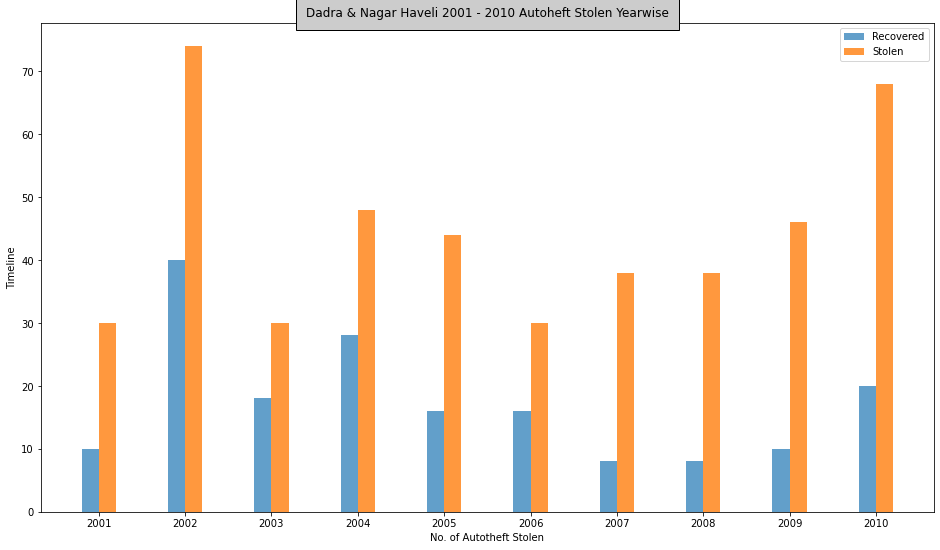

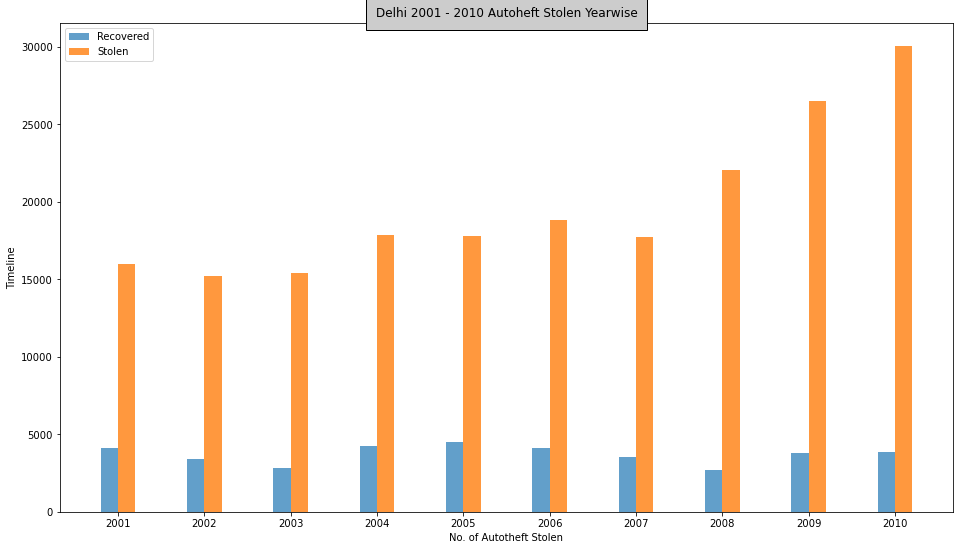

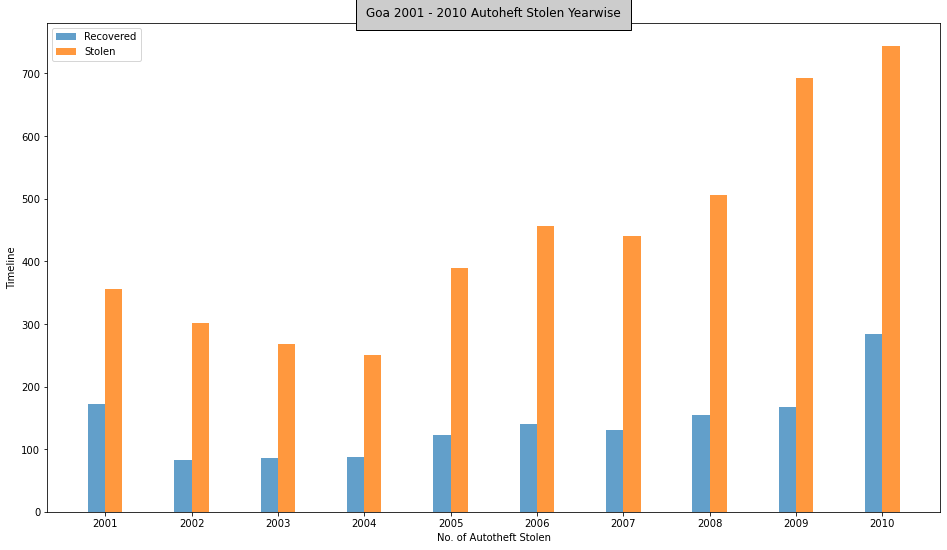

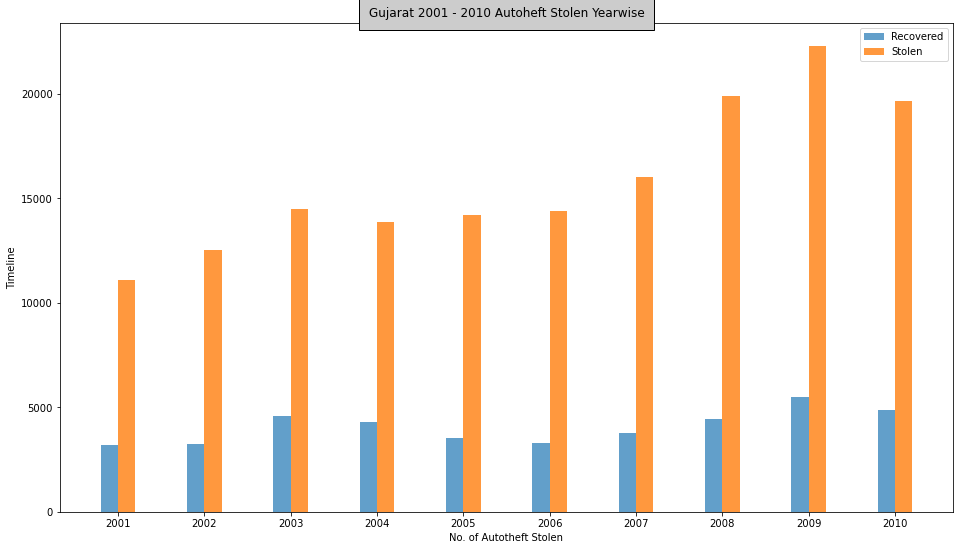

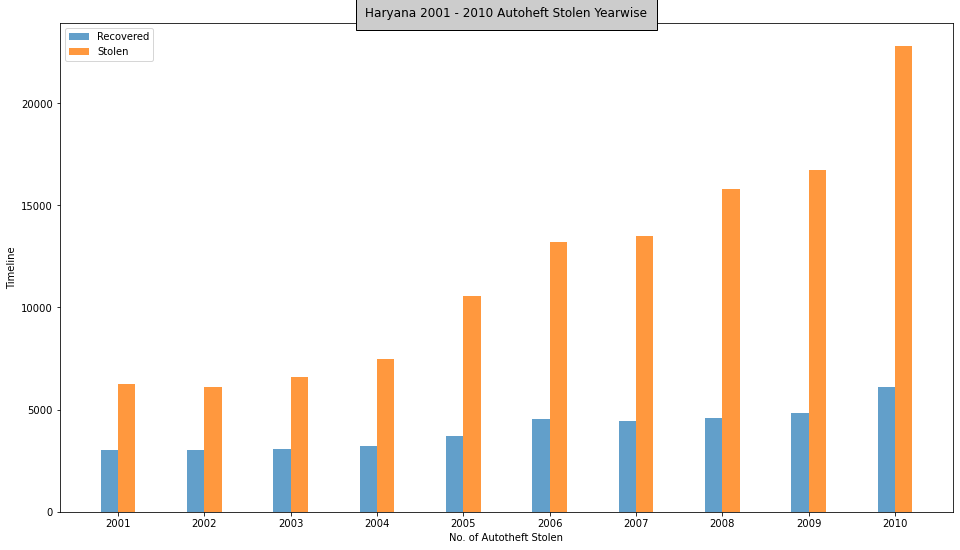

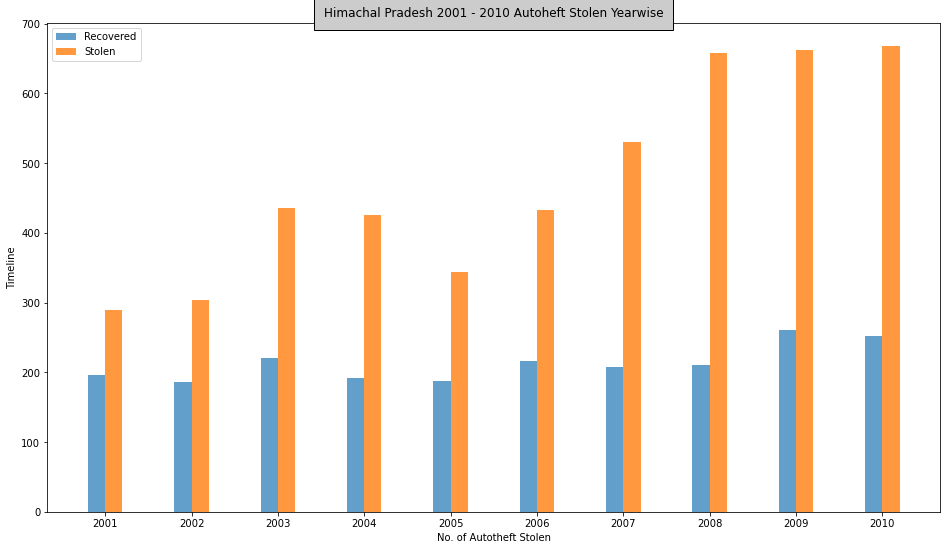

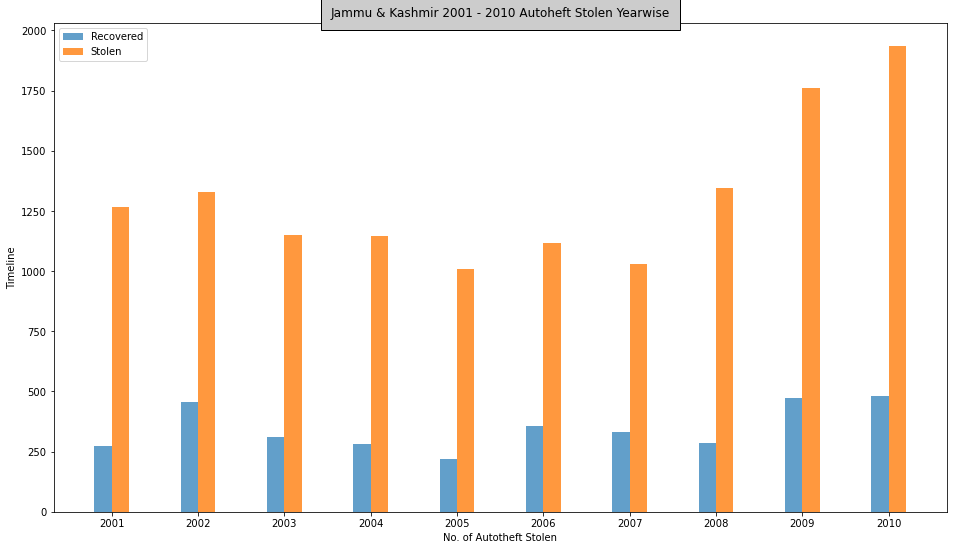

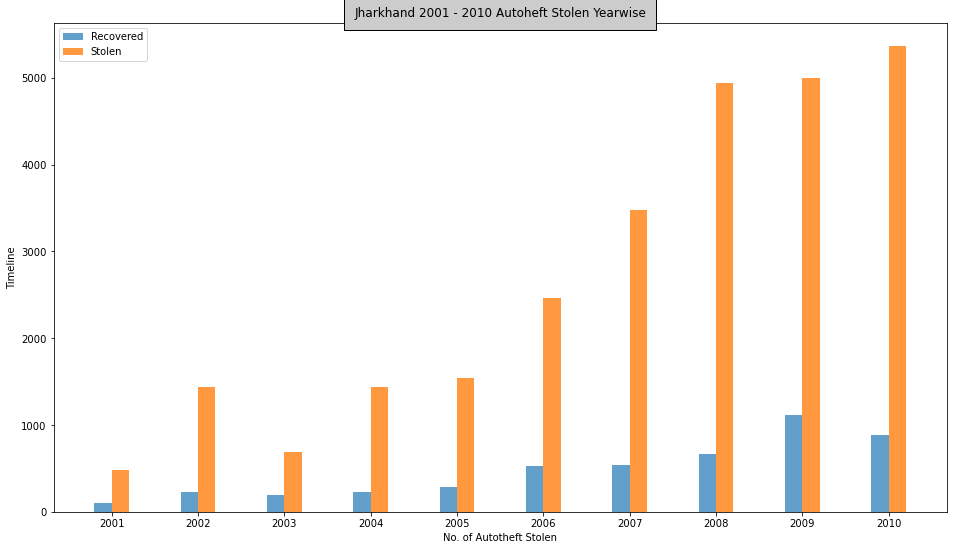

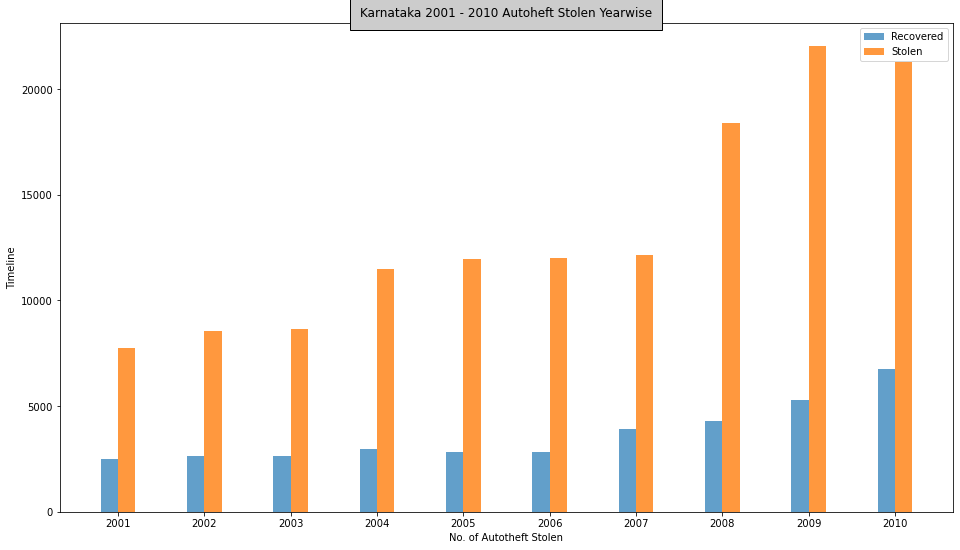

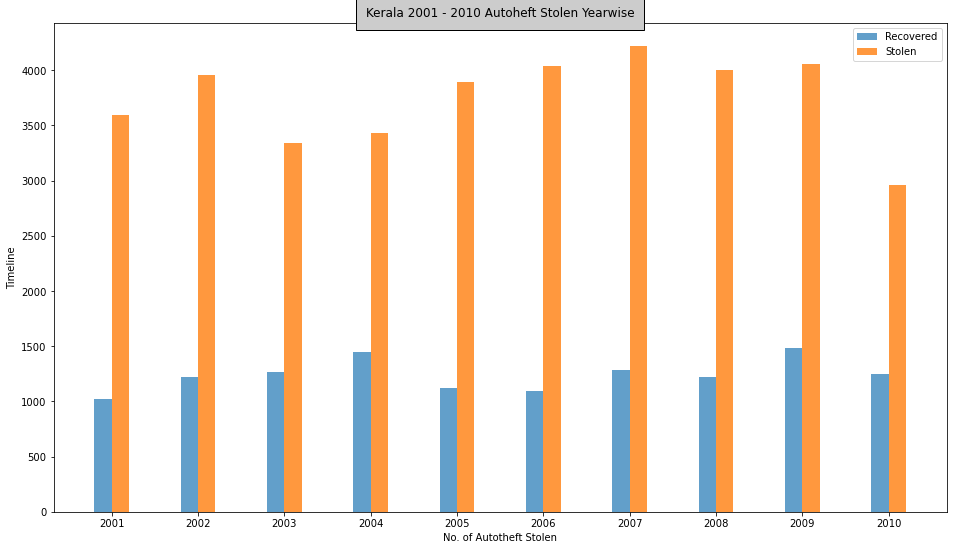

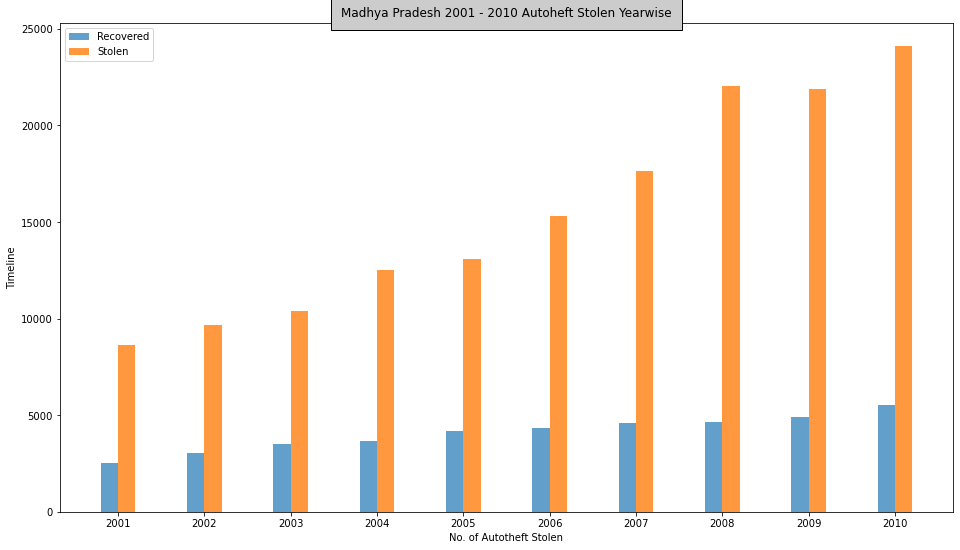

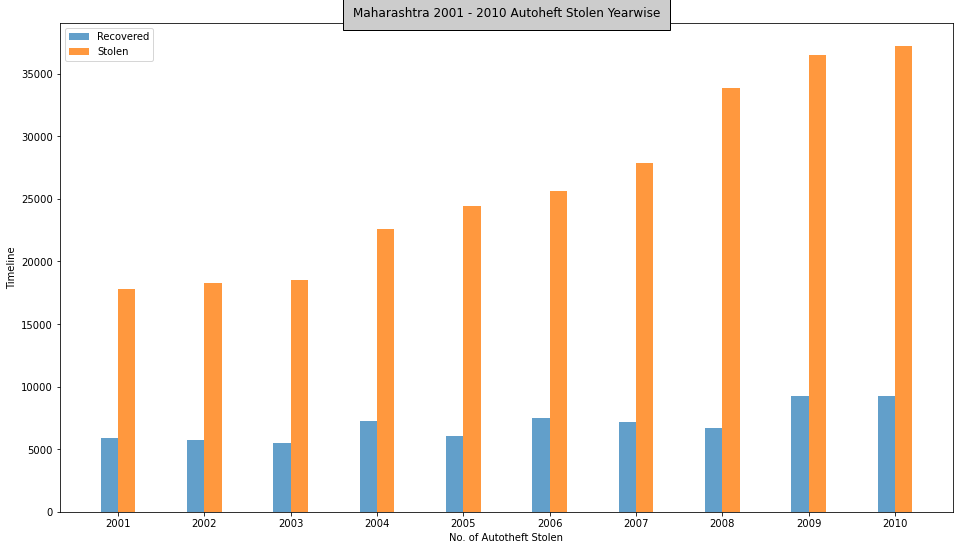

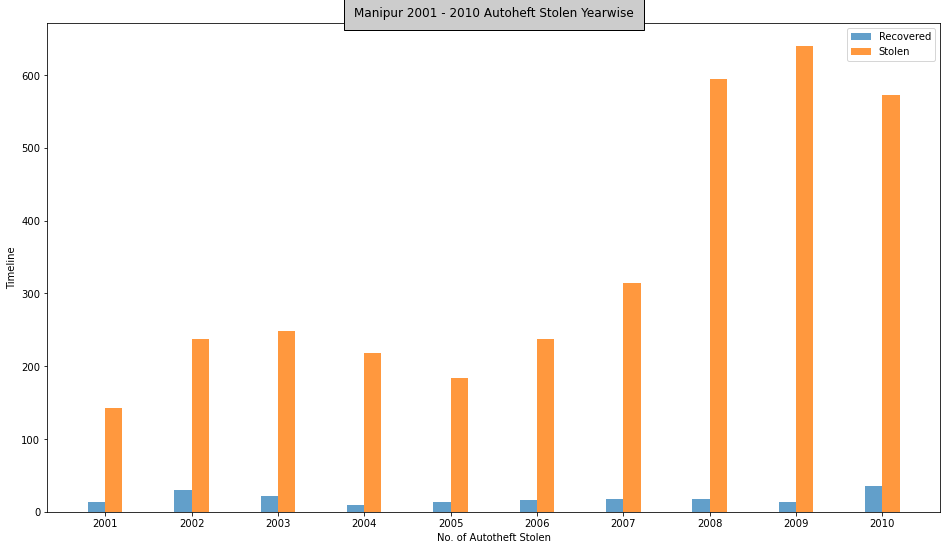

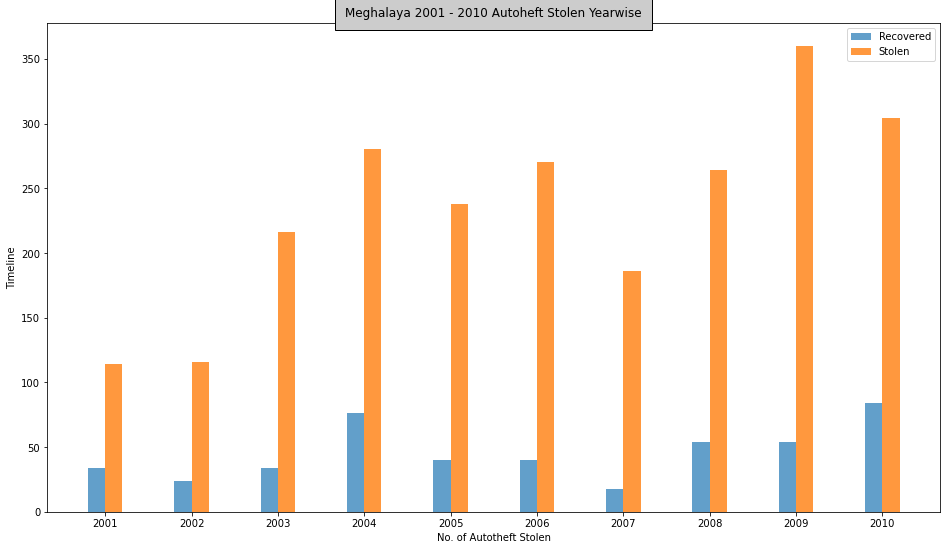

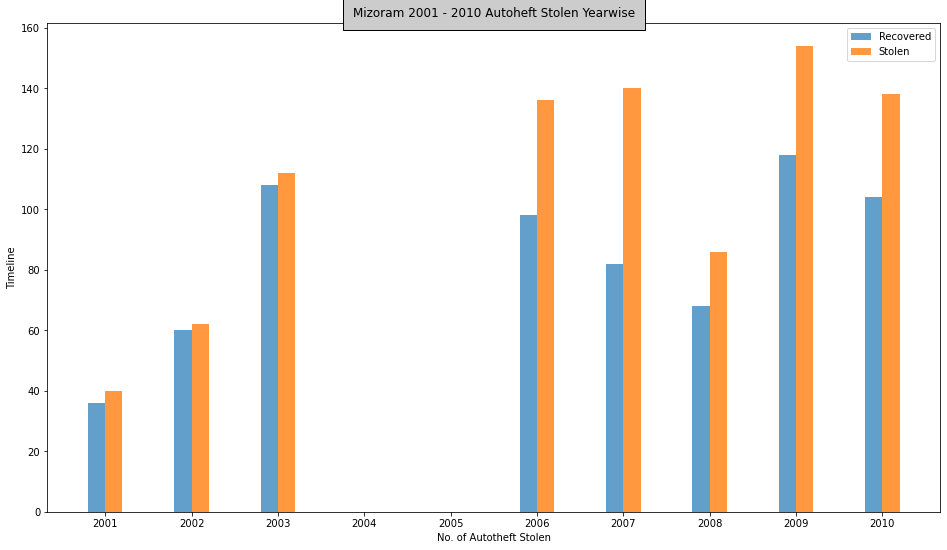

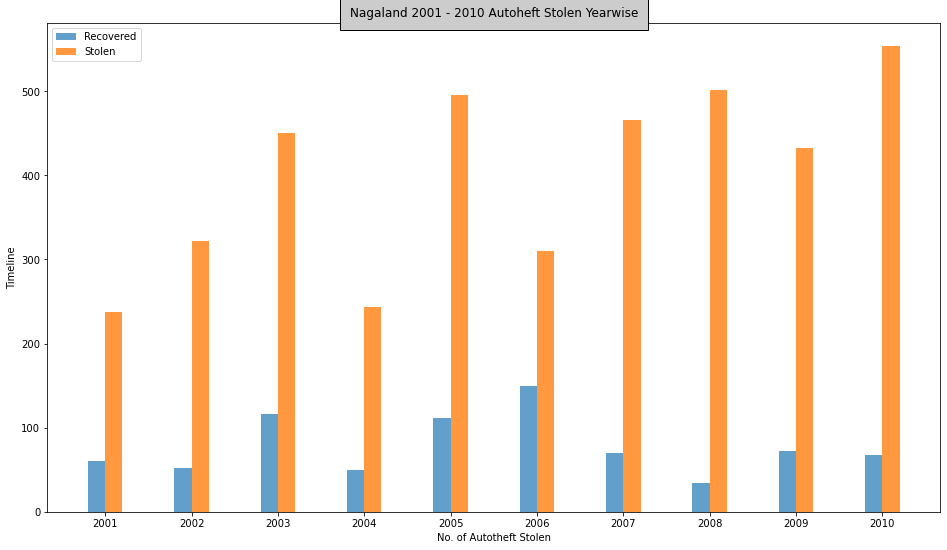

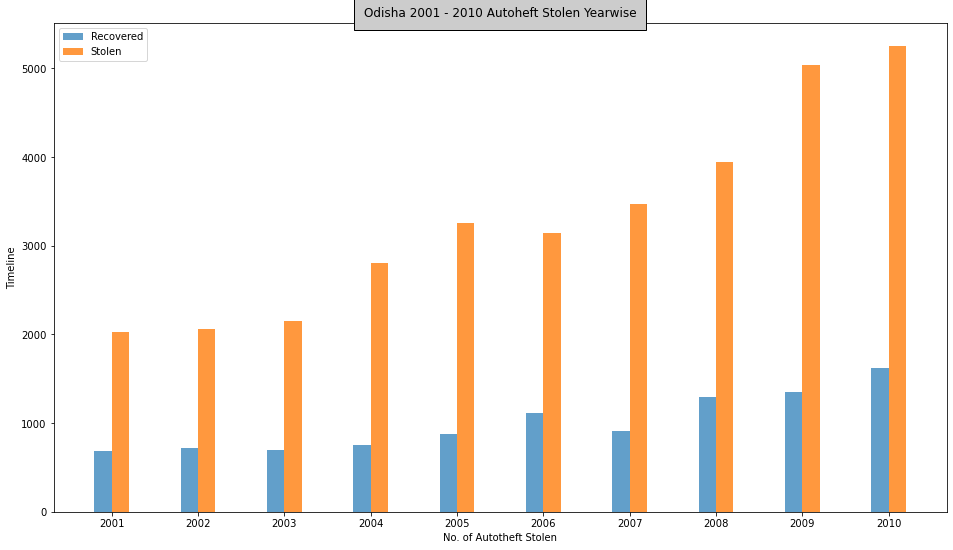

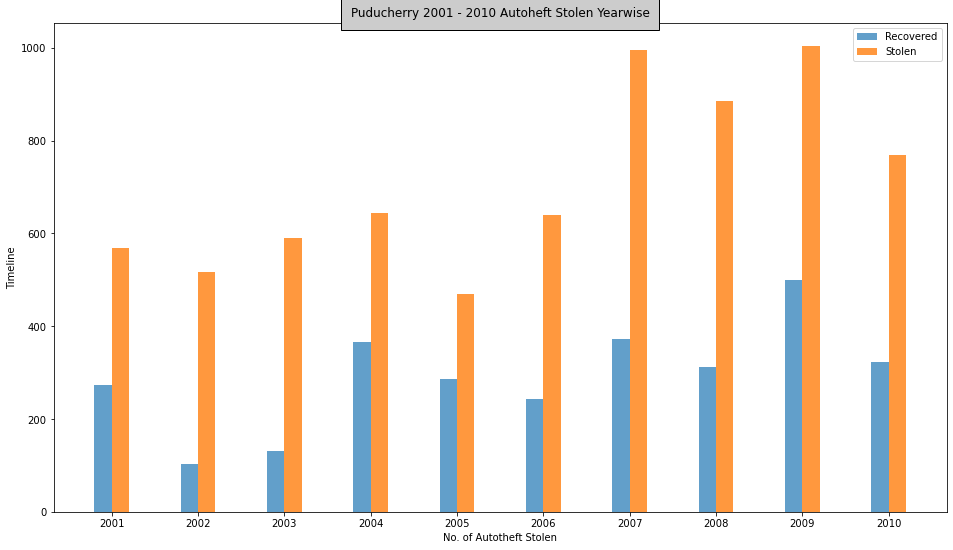

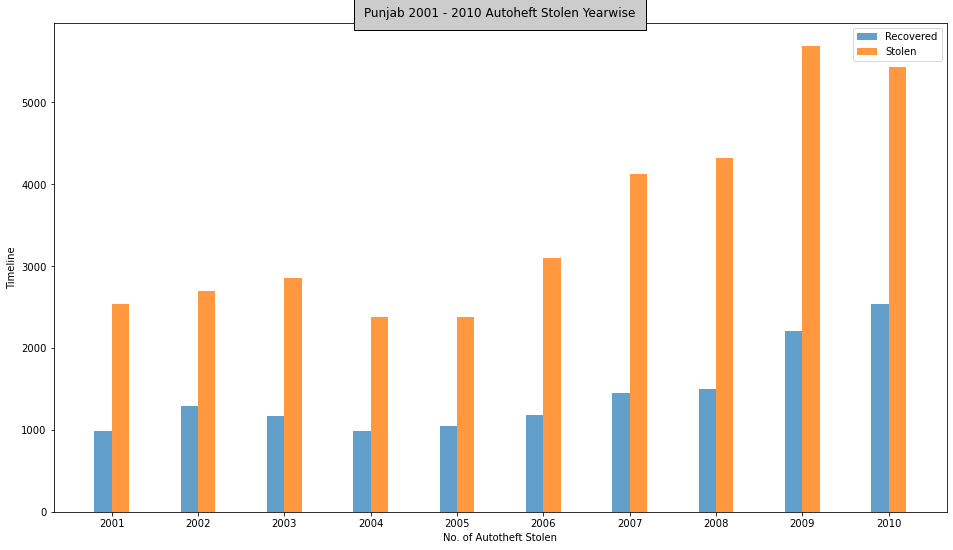

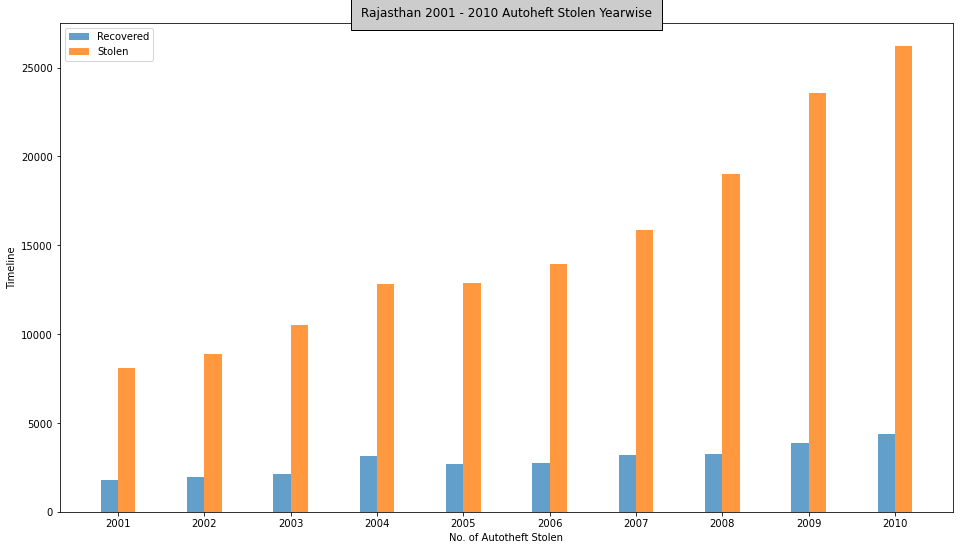

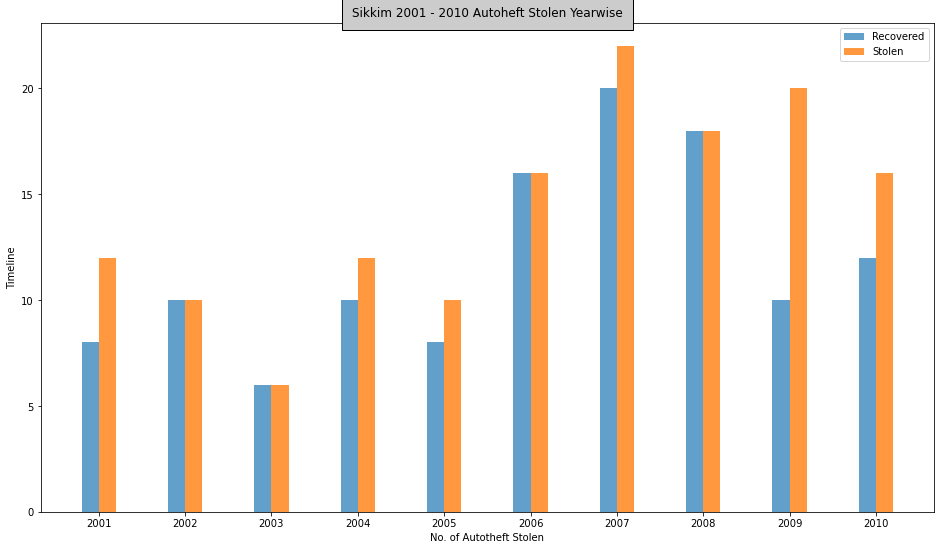

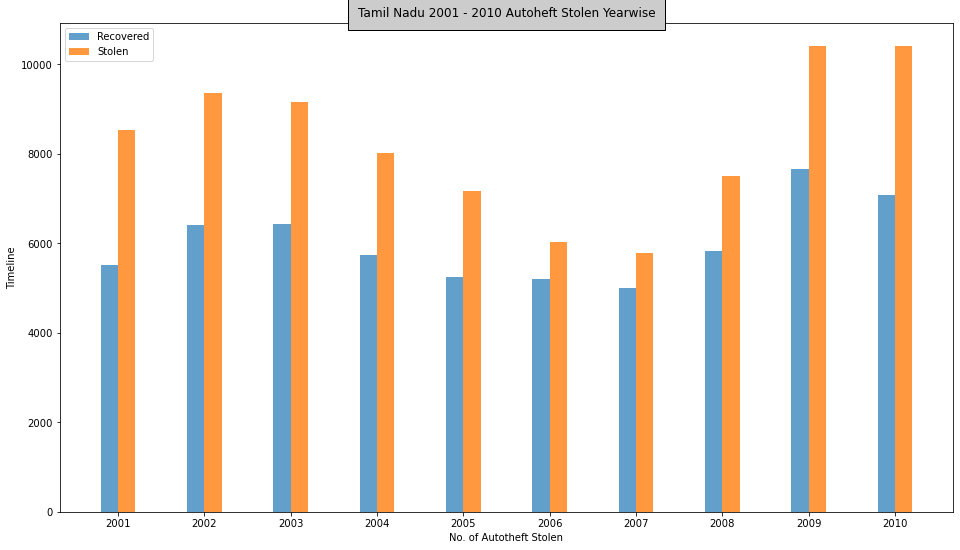

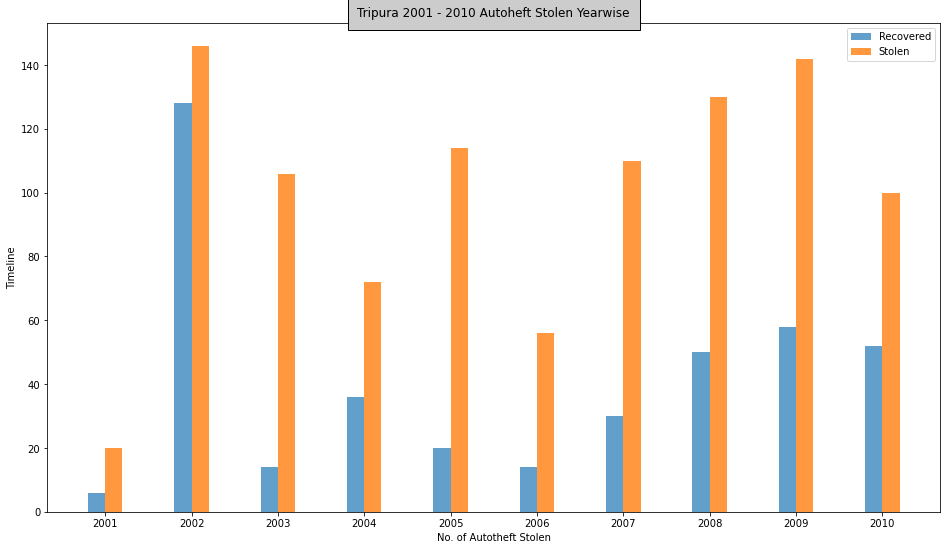

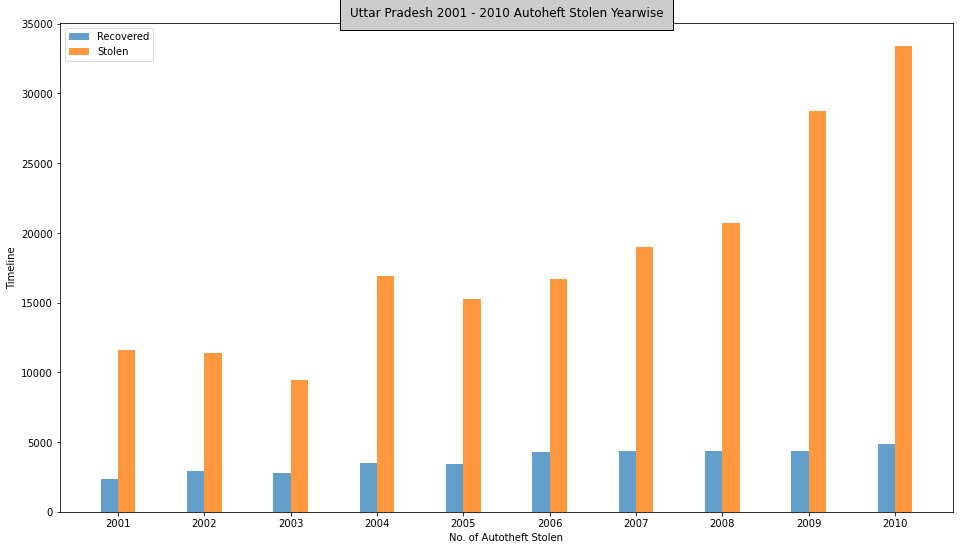

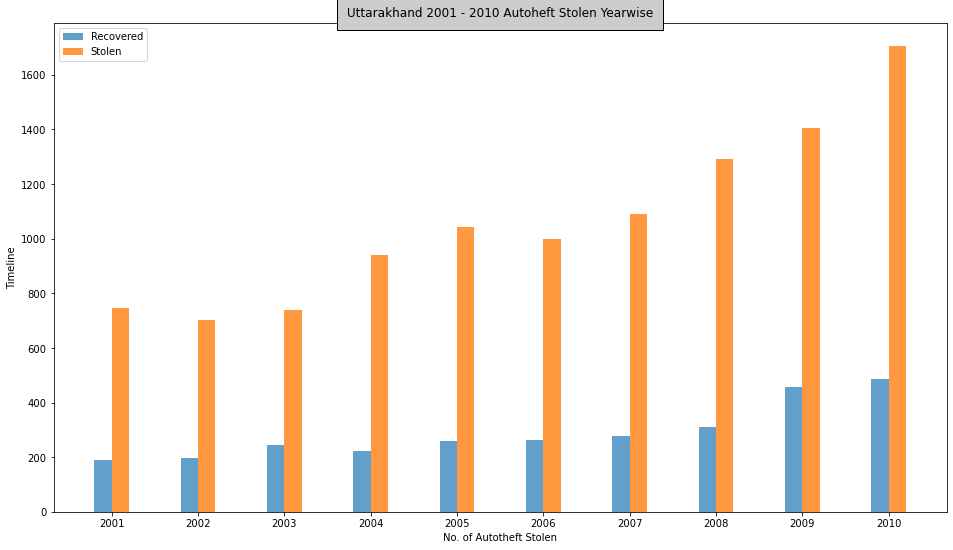

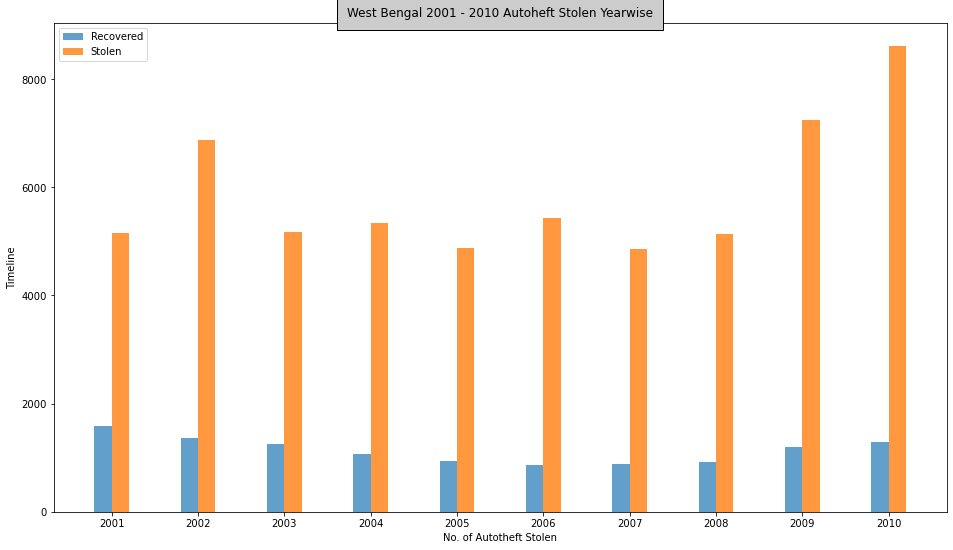

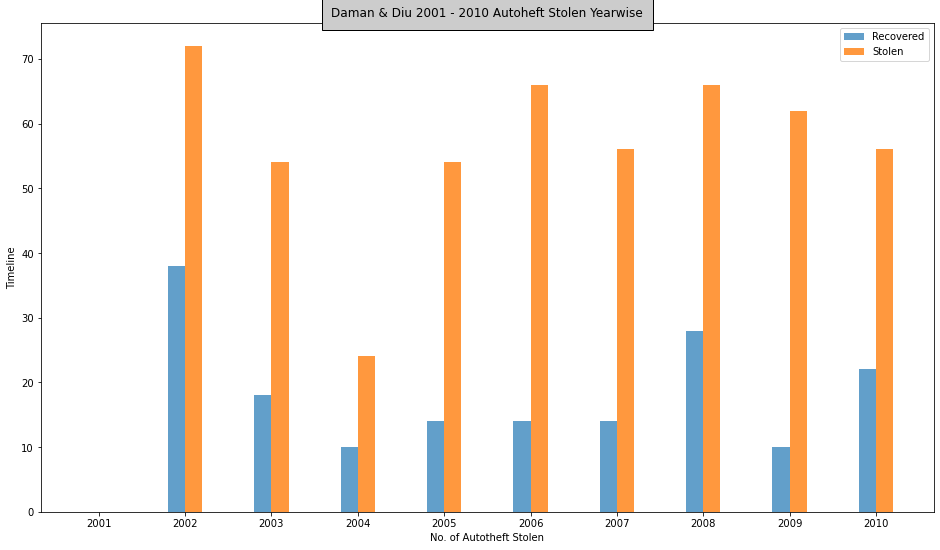

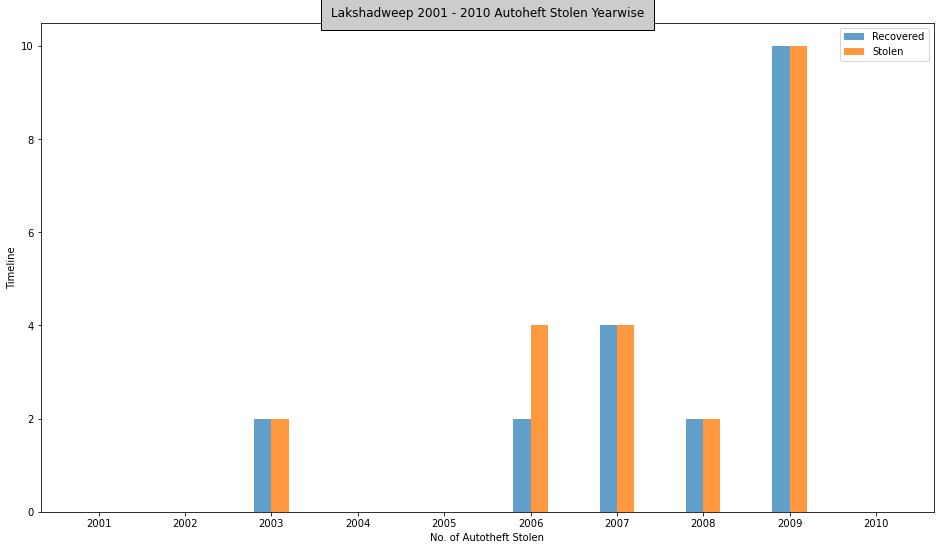

In [8]:
for i in area_names:
    plot_details(i)

- <h3><b>Statewise Instensity of Autotheft Stolen 2001 - 2010</b></h3>

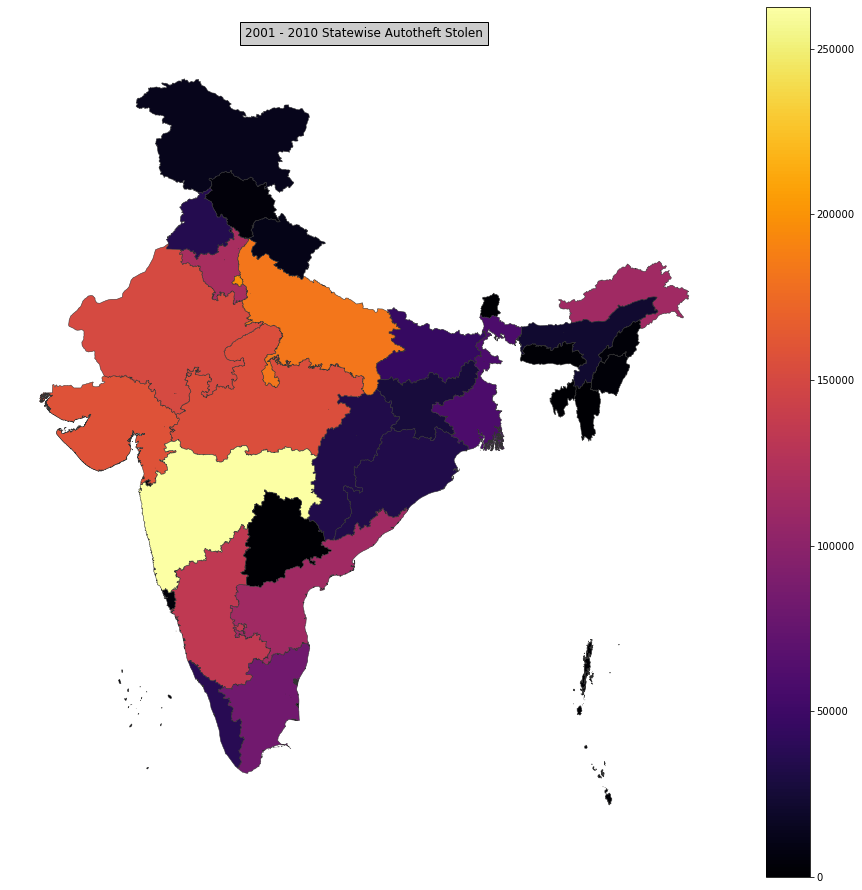

In [9]:
import geopandas as gpd
df = pd.DataFrame(list(zip(area_names, stolen)), columns = ['Area_Name', 'Auto_Theft_Stolen'])
map_file = gpd.read_file('Indian_States.shp')
merged = map_file.set_index('st_nm').join(df.set_index('Area_Name'))
na = ['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Dadara & Nagar Havelli', 'NCT of Delhi', 'Telangana']
val = [166, 113618, 446, 197330, 0]
j = 0
for i in na:
    merged.at[i, list(merged.columns)[1]] = val[j]
    j += 1
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
ax.set_title('2001 - 2010 Statewise Autotheft Stolen', bbox={'facecolor':'0.8', 'pad':5}, loc = 'center')
fig = merged.plot(column='Auto_Theft_Stolen', cmap='inferno', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

<center>For further information or query mail us at <a href = "mailto: aroy02072000@gmail.com">aroy02072000@gmail.com</a></center>


<br><center>&copy; All rights reserved by Webskitters Academy</center>